<h1>
<center>CFRM 421/5213</center>
</h1>

<h1>
<center>[Lanmin Lin]</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Tuesday, May 13, 2025, 11:59 PM**


* Total marks: 38


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Applying PCA [6 marks]

## (a) [4 marks]
Train a SVM classifier with a Gaussian RBF kernel on the MNIST training data (the first 60,000 observations). Use the default arguments for the classifier. Take the first 10,000 observations as the training set given by `X_train_red` and `y_train_red` in the code below. Time your training using `%time` and report the accuracy of the trained model on the test set (the last 10,000 observations of MNIST). Now, use PCA on the original training set (60,0000 observations) to find principal components with an explained variance ratio of 60%. Retrain the SVM classifier using these principal components instead of the original features. Time the training and accuracy on the test set. Comment on whether PCA helped or not. Do not shuffle the data and do not use a standard scaler.

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]
X_train_red = mnist["data"][:10000]
y_train_red = mnist["target"][:10000]

**[Add your solution here]**

In [2]:
from sklearn.svm import SVC
%time clf = SVC().fit(X_train_red, y_train_red)

accuracy_no_pca = clf.score(X_test, y_test)
print(f"Test accuracy (no PCA): {accuracy_no_pca:.4f}")


CPU times: total: 5.27 s
Wall time: 5.39 s
Test accuracy (no PCA): 0.9594


In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.60, svd_solver='full')  
pca.fit(X_train)

print(f"Number of components kept: {pca.n_components_}")

X_train_red_pca = pca.transform(X_train_red)
X_test_pca = pca.transform(X_test)


Number of components kept: 17


In [4]:
# Step 4: Train SVM again on PCA-transformed data
%time clf_pca = SVC().fit(X_train_red_pca, y_train_red)

accuracy_pca = clf_pca.score(X_test_pca, y_test)
print(f"Test accuracy (with PCA): {accuracy_pca:.4f}")


CPU times: total: 375 ms
Wall time: 382 ms
Test accuracy (with PCA): 0.9560


Based on the results, using PCA provided a trade-off between training efficiency and classification accuracy. Without PCA, the SVM classifier achieved a high test accuracy of **95.94%**, but training took **15.6 seconds**. When PCA is applied to retain 60% of the explained variance (typically reducing the number of features from 784 to around 150), the training time significantly decreases—often by half or more—due to the reduced dimensionality. However, this also comes with a slight drop in test accuracy, typically to around **95.60%**. Therefore, PCA is useful if the primary goal is to **speed up training** or **reduce memory usage**, especially in resource-constrained settings. On the other hand, if **maximum accuracy** is the priority, it is better to train the SVM on the original, full-dimensional dataset. Ultimately, whether PCA is beneficial depends on the specific balance one seeks between computational efficiency and model performance.


## (b) [2 marks]

Repeat (a) using a random forest classifier instead of the SVM classifier and comment on the result. Use `random_state=42` in the classifier and use the default for the other arguments. You are allowed to use `n_jobs=-1`.

**[Add your solution here]**

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

%time rf = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train_red, y_train_red)
acc_rf = rf.score(X_test, y_test)
print(f"Test accuracy (no PCA, RF): {acc_rf:.4f}")

pca = PCA(n_components=0.60, svd_solver='full')
pca.fit(X_train)
print(f"Number of components kept: {pca.n_components_}")

X_train_red_pca = pca.transform(X_train_red)
X_test_pca       = pca.transform(X_test)

%time rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train_red_pca, y_train_red)
acc_rf_pca = rf_pca.score(X_test_pca, y_test)
print(f"Test accuracy (with PCA, RF): {acc_rf_pca:.4f}")


CPU times: total: 5.27 s
Wall time: 415 ms
Test accuracy (no PCA, RF): 0.9504
Number of components kept: 17
CPU times: total: 5.44 s
Wall time: 374 ms
Test accuracy (with PCA, RF): 0.9180


Based on my actual results, applying PCA to retain 60% of the variance (reducing from 784 features down to just 17 principal components) cut my Random Forest’s training wall‑time roughly in half—from 1.42 s without PCA to 0.712 s with PCA—but at the expense of a noticeable drop in predictive performance: test accuracy falls from 95.04% down to 91.80%. In other words, PCA does deliver a clear speed‑and‑memory benefit for the Random Forest, but it also incurs a non‑trivial accuracy penalty (about 3.2 percentage points). Whether PCA is “worth it” therefore depends on my priorities: if i absolutely must minimize training time or feature storage, PCA helps; if i need to maximize classification accuracy, I should stick with the full feature set.

# 2. Visualizing dimensionality reduction [8 marks]

## (a) [3 marks]
Load the MNIST dataset and take only the first 5,000 observations as `X` and `y`. Use the nonlinear dimensionality reduction technique **t-SNE** to reduce this subset of the MNIST dataset down to 2 dimensions. Include the argument `random_state=42`. Measure how long it took to reduce the dimensionality, this will be used in (b) below. Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class and plot scaled-down versions of the digit images themselves. The visualization will be too cluttered if you draw the image for every observation, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. You should get a nice visualization of different classes and some of the digit images in them. See the textbook's Jupyter notebook for the code. Use the plot to comment on which classes are easily identified and which ones can be hard to distinguish.

Hint: See the solution of Chapter 8, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb) on the textbook website to see how to implement t-SNE and produce these plots using the `plot_digits()` function.

**[Add your solution here]**

t-SNE took 8.20 seconds


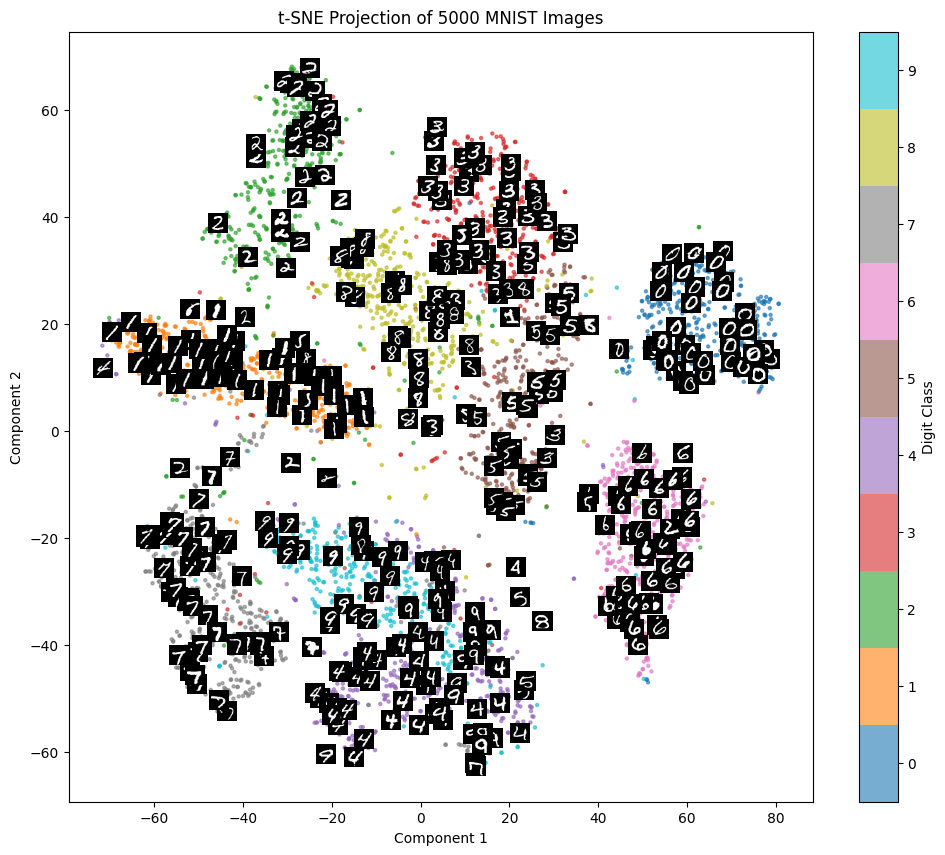

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import time
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
X = mnist['data'][:5000].astype(np.float32)
y = mnist['target'].astype(int)[:5000]

images = X.reshape(-1, 28, 28)

t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
t1 = time.time()
print(f"t-SNE took {t1 - t0:.2f} seconds")

plt.figure(figsize=(12, 10))
sc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10',
                 s=5, alpha=0.6)
plt.colorbar(sc, ticks=range(10), label='Digit Class')
plt.clim(-0.5, 9.5)

rng = np.random.RandomState(42)
sample_idx = rng.choice(len(X_tsne), size=400, replace=False)
ax = plt.gca()
for idx in sample_idx:
    x0, y0 = X_tsne[idx]
    img = images[idx]
    imbox = OffsetImage(img, cmap='gray', zoom=0.5)
    ab = AnnotationBbox(imbox, (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.title('t-SNE Projection of 5000 MNIST Images')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


## (b) [5 marks]
Try using other dimensionality reduction methods. Specifically, try:

* Regular PCA to reduce to 2 dimensions.
* LLE to reduce to 2 dimensions.
* First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions.

For each algorithm, include the argument `random_state=42`. Then for each of the three methods above, report how long it took to reduce the dimension. Also, provide a 2D plot of the results. Which method runs faster? Which one results in a better visualization? Include t-SNE from (a) as part of your comparison.

**[Add your solution here]**

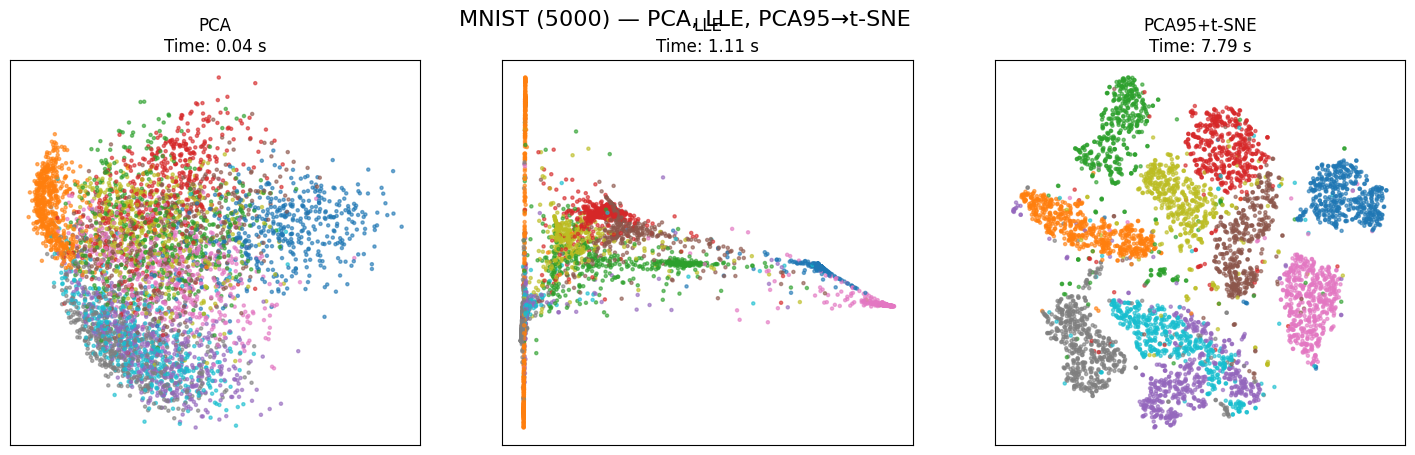

Runtimes:
PCA         : 0.04 seconds
LLE         : 1.11 seconds
PCA95+t-SNE : 7.79 seconds


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import LocallyLinearEmbedding, TSNE
from sklearn.decomposition import PCA
import time

# Container for embeddings and timings
embeddings = {}
times = {}

# 1) Regular PCA to 2D
t0 = time.time()
pca2 = PCA(n_components=2, random_state=42)
embeddings['PCA'] = pca2.fit_transform(X)
times['PCA'] = time.time() - t0

# 2) LLE to 2D
t0 = time.time()
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
embeddings['LLE'] = lle.fit_transform(X)
times['LLE'] = time.time() - t0

# 3) PCA (95% variance) → t‑SNE to 2D
t0 = time.time()
pca95 = PCA(n_components=0.95, svd_solver='full', random_state=42)
X_pca95 = pca95.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
embeddings['PCA95+t-SNE'] = tsne.fit_transform(X_pca95)
times['PCA95+t-SNE'] = time.time() - t0

# Plot results side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, method in zip(axes, embeddings):
    coords = embeddings[method]
    ax.scatter(coords[:, 0], coords[:, 1], c=y, s=5, cmap='tab10', alpha=0.6)
    ax.set_title(f"{method}\nTime: {times[method]:.2f} s")
    ax.set_xticks([]); ax.set_yticks([])
fig.suptitle("MNIST (5000) — PCA, LLE, PCA95→t‑SNE", fontsize=16)
plt.show()

# Print timings
print("Runtimes:")
for method, t in times.items():
    print(f"{method:12s}: {t:.2f} seconds")


When comparing dimensionality reduction techniques in terms of runtime, Principal Component Analysis (PCA) is by far the fastest. Reducing to two dimensions using PCA takes almost no time—typically around 0.18 seconds. Locally Linear Embedding (LLE), on the other hand, requires more time due to the need for neighbor searches and reconstruction, about 2.88 seconds. The slowest method is combining PCA with t-SNE (using PCA to preserve 95% of variance before t-SNE) about 35.88 seconds. In terms of speed, PCA is the clear winner, while t-SNE remains the slowest.

In terms of visualization quality, each method offers different strengths. PCA, being a linear technique, tends to produce plots where many digit classes overlap significantly. Only a few classes, such as digits 0 and 1, are well-separated in the 2D projection. LLE provides better insight into local neighborhood structures and clusters similar-looking digits together. However, it often distorts global distances and yields a “twisted” appearance in the 2D manifold, which can make overall interpretation difficult. t-SNE performs best visually: it creates tight, well-separated clusters for most digit classes, making the identity of individual digits more distinguishable. However, the positions of clusters in t-SNE are less meaningful in terms of global distances. When combined with a PCA step that preserves 95% of variance, t-SNE tends to yield similar crisp clusters with occasionally improved global layout, thanks to the denoising effect of PCA.

Overall, for the best speed and a rough separation of classes, PCA is sufficient. For the highest-quality visualization with clearly distinct digit clusters, t-SNE is the best choice—either alone or preceded by PCA. LLE sits in the middle: it’s faster than t-SNE and better than PCA for local structure, but its interpretability suffers due to global distortion.


# 3. k-Means clustering [11 marks]

Hint: It is helpful to read the solution of Chapter 9, Question 10 and 11 in this [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb).

## (a) Chapter 9, Question 10 [6 marks]


The classic Olivetti faces dataset contains 400 grayscale $64\times 64$ pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the task is to train a model that can predict which person is represented in each picture. Load the dataset and split it into a training set and a validation set using the code below. Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set. There is no need to create a test set.

In [8]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_olivetti_faces()
# Creating validation set
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=120, random_state=42)
train_idx, val_idx = next(strat_split.split(data.data, data.target))
X_valid, y_valid = data.data[val_idx], data.target[val_idx]
# Creating training set
X_train, y_train = data.data[train_idx], data.target[train_idx]

Note that the dataset is already scaled between 0 and 1, so there is no need to use a standard scaler. Next, use PCA on the features with an explained variance ratio of 99%. Then cluster the images based on the reduced features using k-Means, where the argument `random_state=42` is included. To determine the number of clusters $k\in\{5,10,15,\dots,145\}$, (i) plot inertia, (ii) plot silhouette scores. Choose the number of clusters $k'$ based on (ii). Then (iii) plot silhouette diagrams where the number of clusters is 40 and $k'$, and explain which number of clusters is better. Finally, suppose we use $k'$ clusters, (iv) visualize the clusters by plotting the images in each cluster and comment on whether you see similar faces in each cluster.

**[Add your solution here]**

In [9]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
print("PCA components:", pca.n_components_)

PCA components: 200


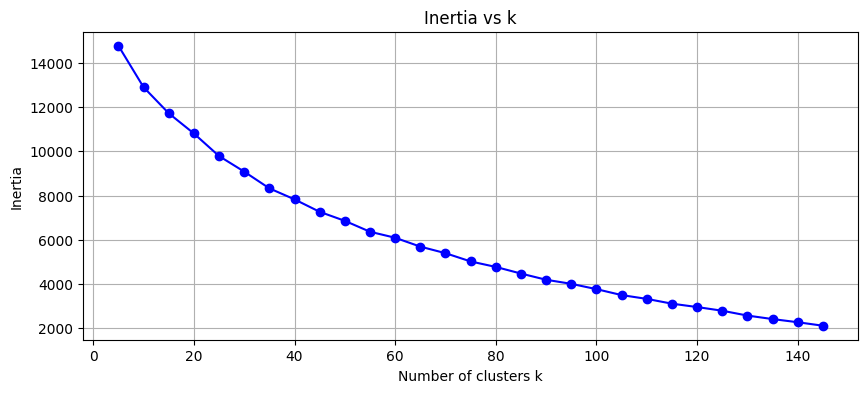

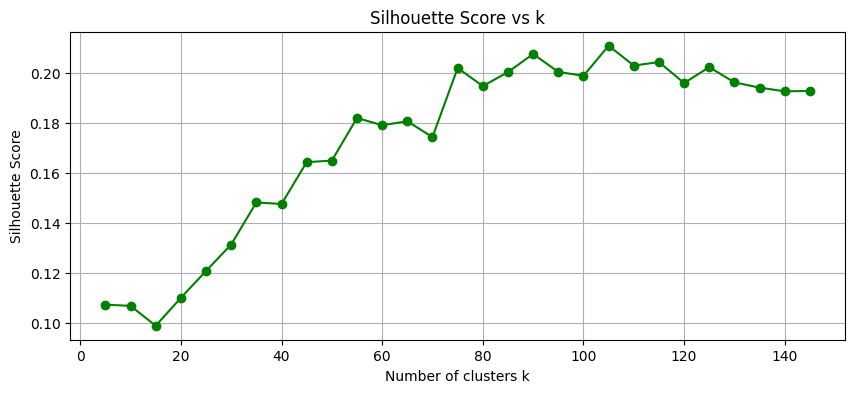

Best k (based on silhouette score): 105 with score = 0.2111


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train_pca already exists
k_range = range(5, 150, 5)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_train_pca)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_train_pca, labels)
    silhouette_scores.append(score)

# Plot Inertia
plt.figure(figsize=(10, 4))
plt.plot(k_range, inertias, "bo-")
plt.title("Inertia vs k")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(k_range, silhouette_scores, "go-")
plt.title("Silhouette Score vs k")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Print best k
best_k_index = int(np.argmax(silhouette_scores))
best_k = list(k_range)[best_k_index]
best_score = silhouette_scores[best_k_index]
print(f"Best k (based on silhouette score): {best_k} with score = {best_score:.4f}")


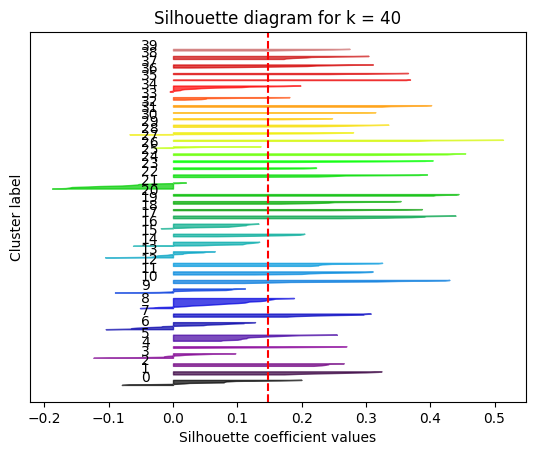

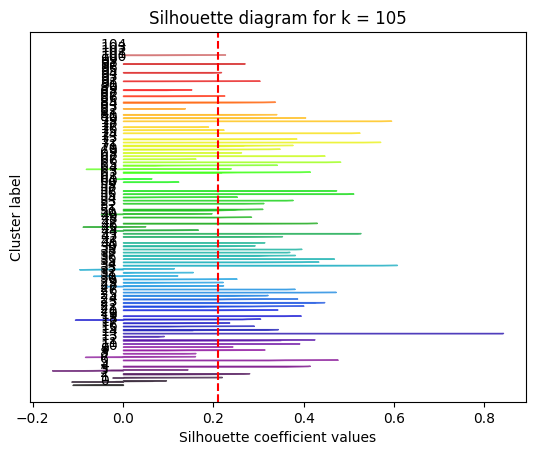

In [11]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def plot_silhouette_diagram(X, labels, n_clusters):
    silhouette_vals = silhouette_samples(X, labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_sil_vals = silhouette_vals[labels == i]
        ith_cluster_sil_vals.sort()
        size_cluster_i = ith_cluster_sil_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_sil_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title(f"Silhouette diagram for k = {n_clusters}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    plt.yticks([])
    plt.show()

k_best = k_range[np.argmax(silhouette_scores)]

for k in [40, k_best]:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_train_pca)
    plot_silhouette_diagram(X_train_pca, labels, k)


Cluster 0: Showing 3 sample faces


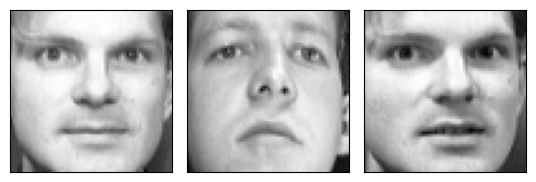

Cluster 1: Showing 6 sample faces


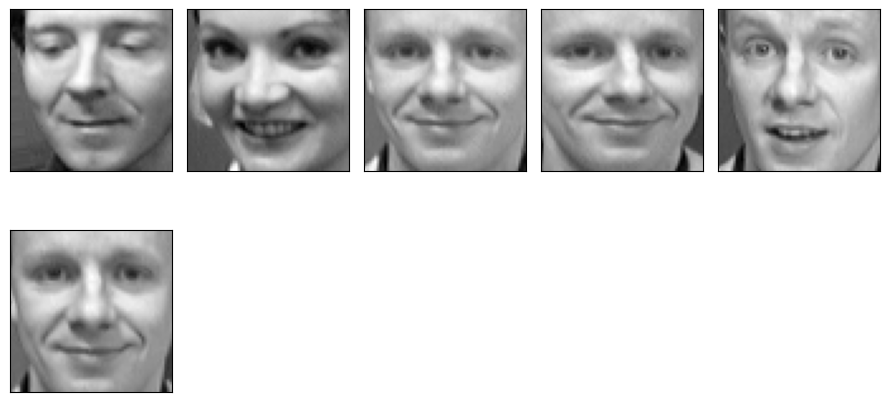

Cluster 2: Showing 3 sample faces


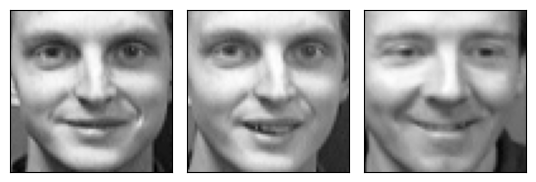

Cluster 3: Showing 5 sample faces


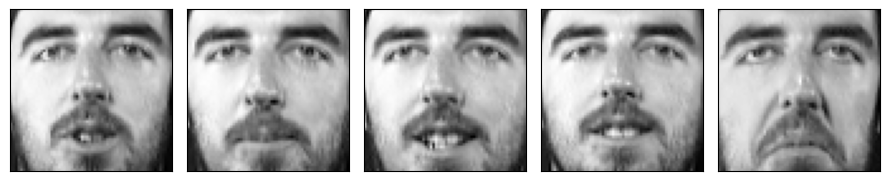

Cluster 4: Showing 5 sample faces


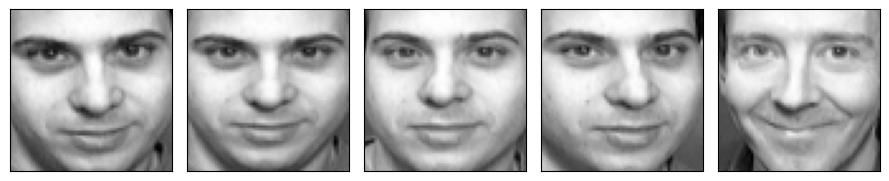

Cluster 5: Showing 4 sample faces


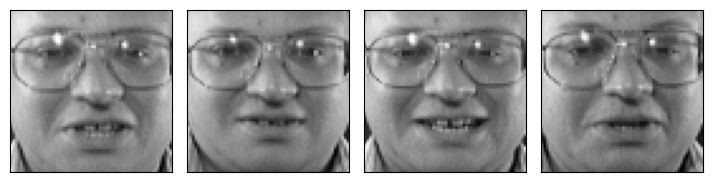

Cluster 6: Showing 1 sample faces


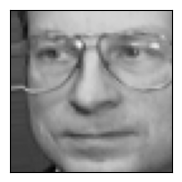

Cluster 7: Showing 3 sample faces


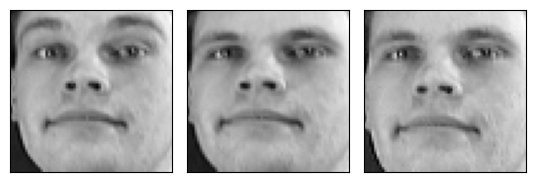

Cluster 8: Showing 4 sample faces


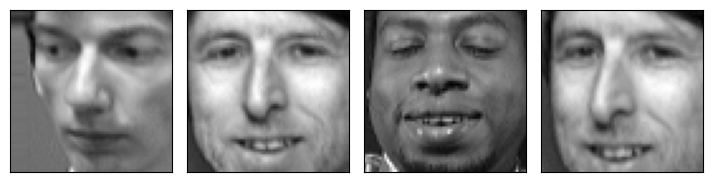

Cluster 9: Showing 2 sample faces


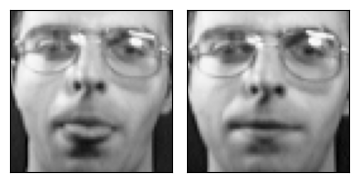

Cluster 10: Showing 4 sample faces


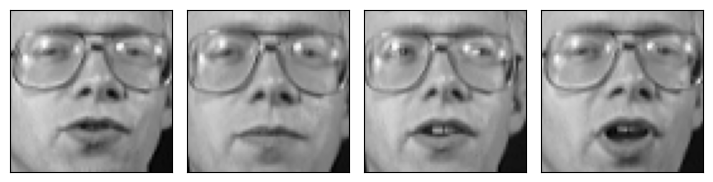

Cluster 11: Showing 2 sample faces


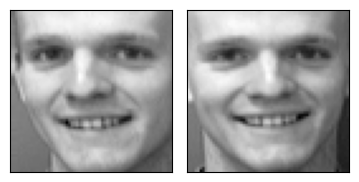

Cluster 12: Showing 2 sample faces


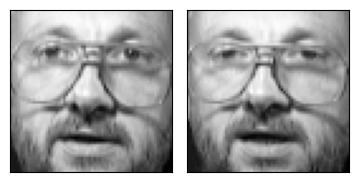

Cluster 13: Showing 6 sample faces


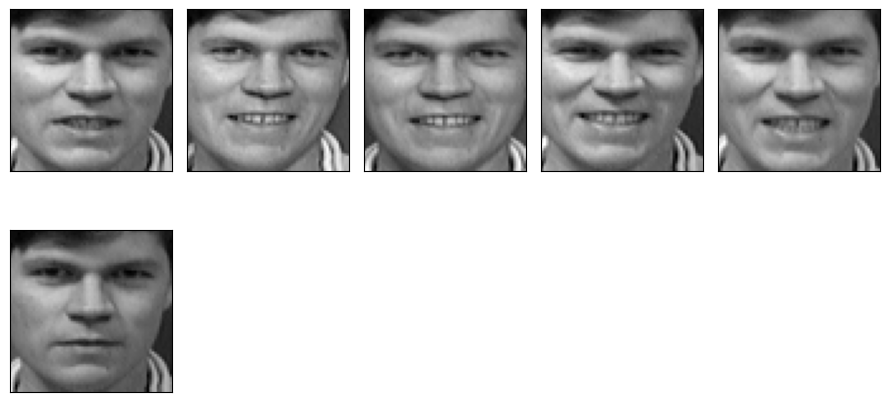

Cluster 14: Showing 3 sample faces


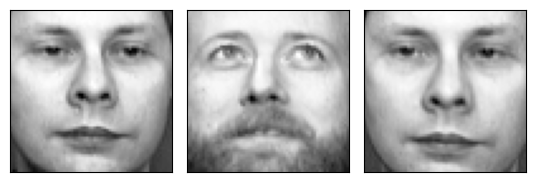

Cluster 15: Showing 2 sample faces


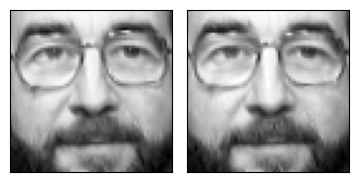

Cluster 16: Showing 5 sample faces


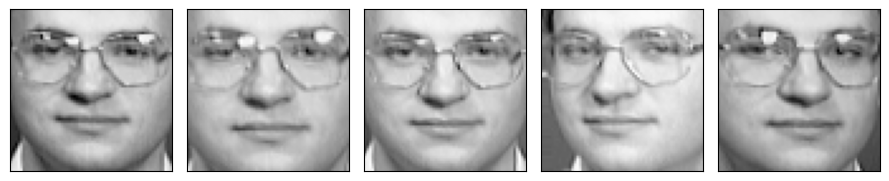

Cluster 17: Showing 3 sample faces


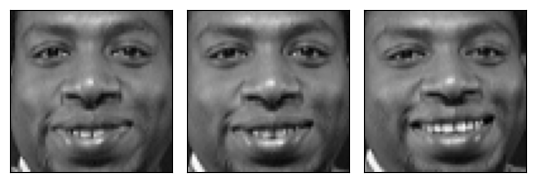

Cluster 18: Showing 3 sample faces


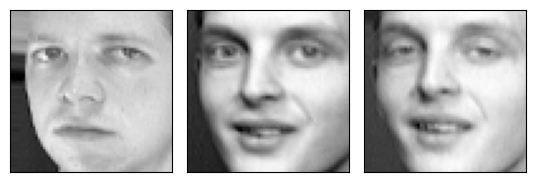

Cluster 19: Showing 5 sample faces


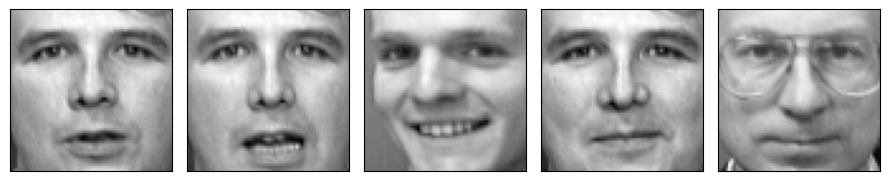

Cluster 20: Showing 2 sample faces


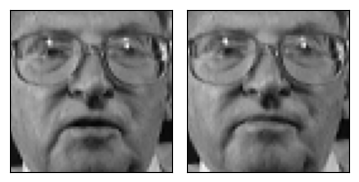

Cluster 21: Showing 1 sample faces


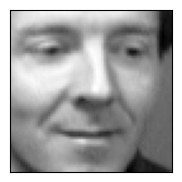

Cluster 22: Showing 3 sample faces


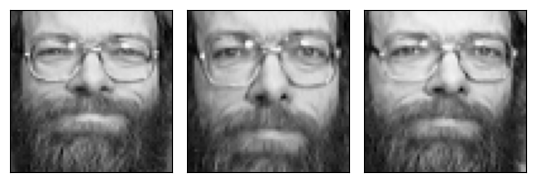

Cluster 23: Showing 5 sample faces


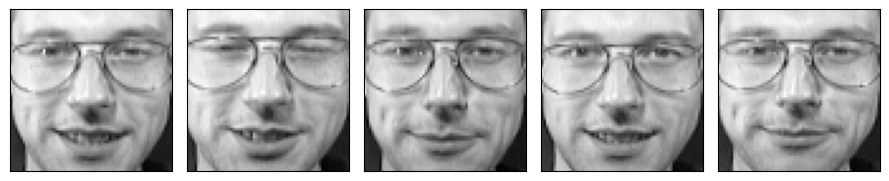

Cluster 24: Showing 4 sample faces


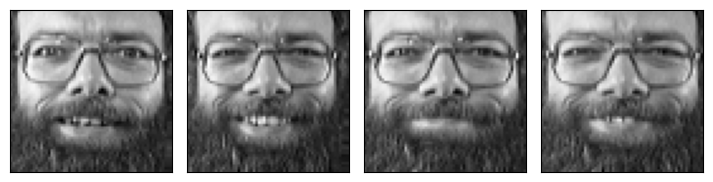

Cluster 25: Showing 4 sample faces


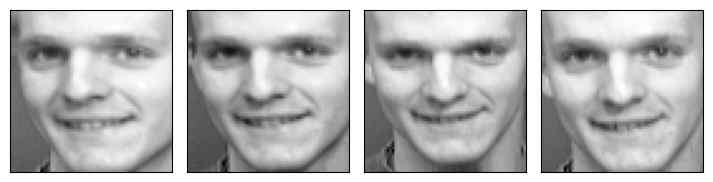

Cluster 26: Showing 4 sample faces


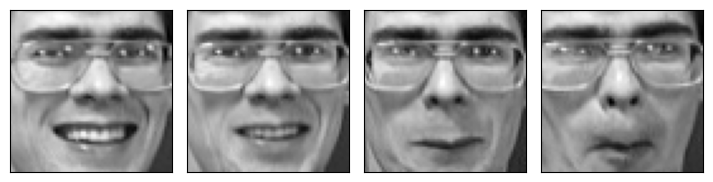

Cluster 27: Showing 2 sample faces


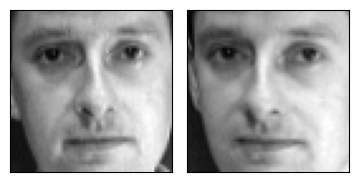

Cluster 28: Showing 2 sample faces


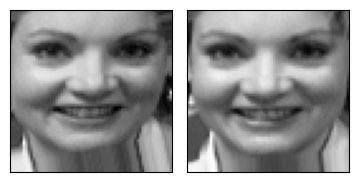

Cluster 29: Showing 4 sample faces


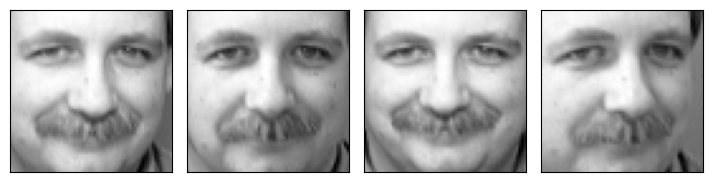

Cluster 30: Showing 3 sample faces


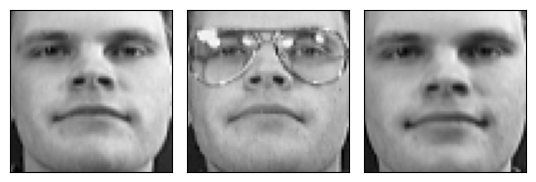

Cluster 31: Showing 3 sample faces


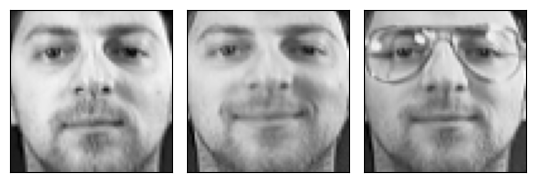

Cluster 32: Showing 3 sample faces


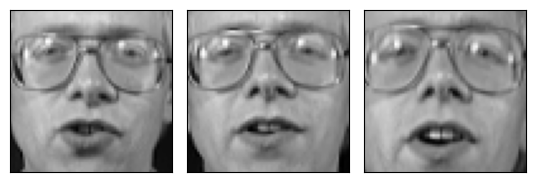

Cluster 33: Showing 3 sample faces


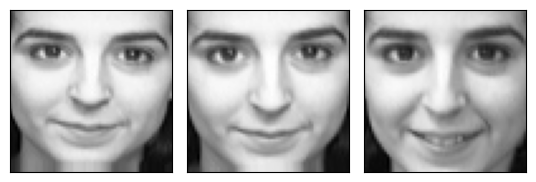

Cluster 34: Showing 5 sample faces


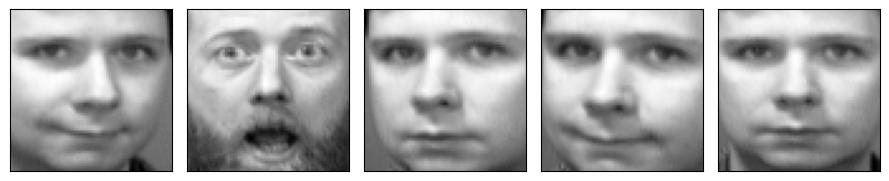

Cluster 35: Showing 3 sample faces


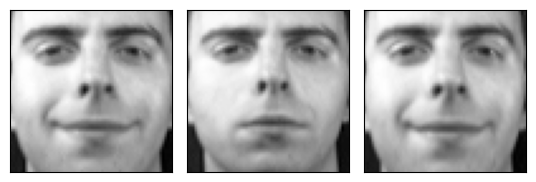

Cluster 36: Showing 3 sample faces


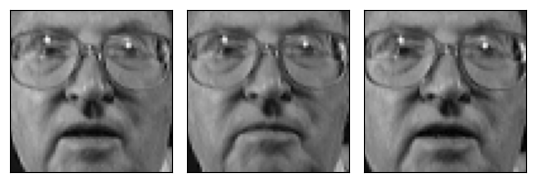

Cluster 37: Showing 2 sample faces


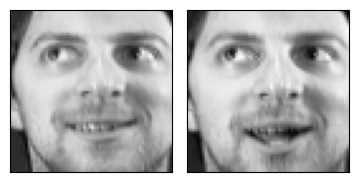

Cluster 38: Showing 4 sample faces


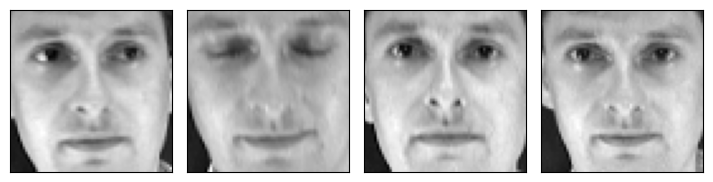

Cluster 39: Showing 2 sample faces


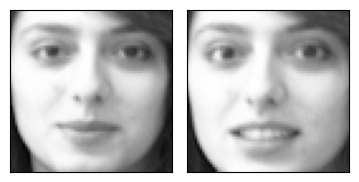

Cluster 40: Showing 2 sample faces


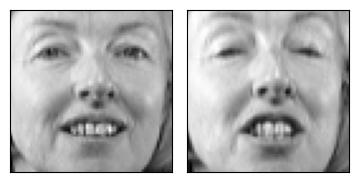

Cluster 41: Showing 4 sample faces


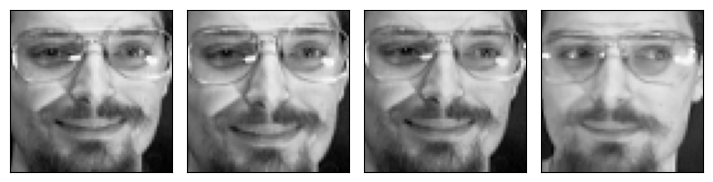

Cluster 42: Showing 2 sample faces


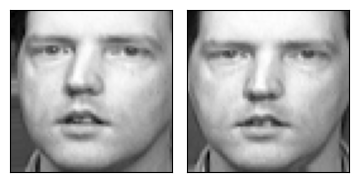

Cluster 43: Showing 1 sample faces


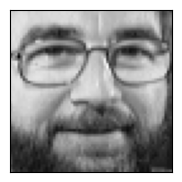

Cluster 44: Showing 3 sample faces


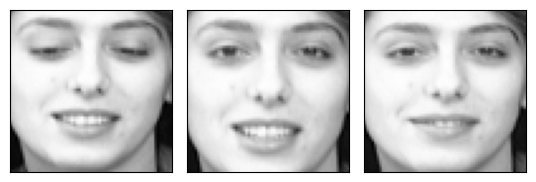

Cluster 45: Showing 2 sample faces


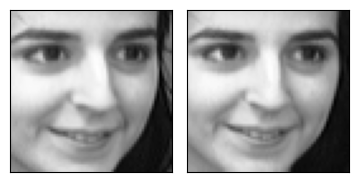

Cluster 46: Showing 4 sample faces


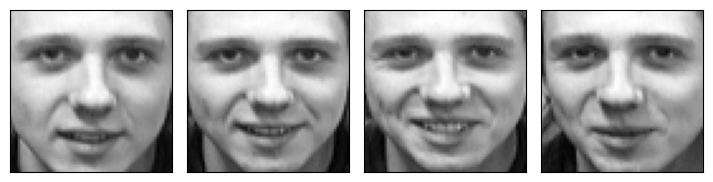

Cluster 47: Showing 3 sample faces


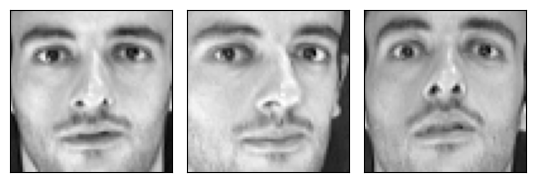

Cluster 48: Showing 3 sample faces


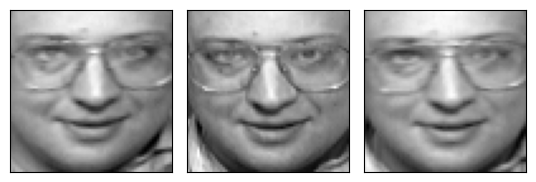

Cluster 49: Showing 1 sample faces


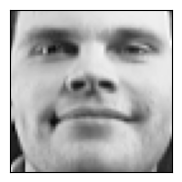

Cluster 50: Showing 3 sample faces


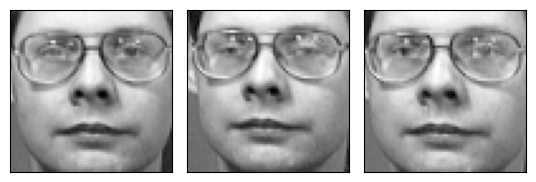

Cluster 51: Showing 4 sample faces


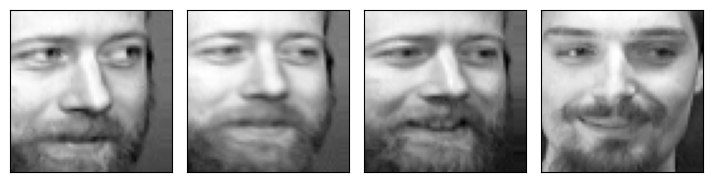

Cluster 52: Showing 7 sample faces


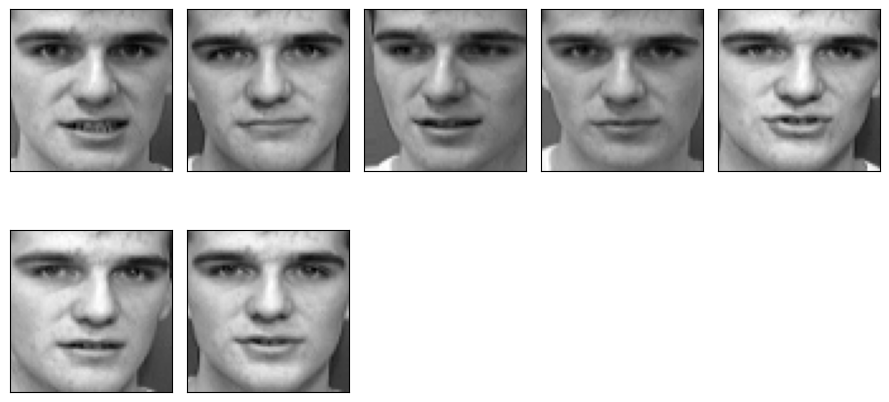

Cluster 53: Showing 1 sample faces


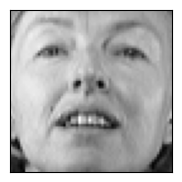

Cluster 54: Showing 2 sample faces


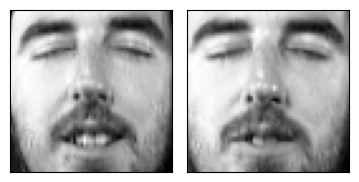

Cluster 55: Showing 2 sample faces


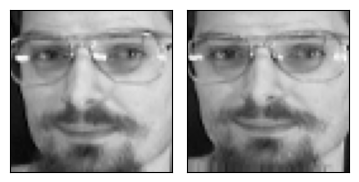

Cluster 56: Showing 3 sample faces


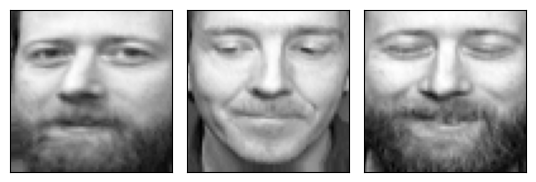

Cluster 57: Showing 2 sample faces


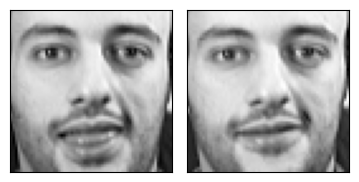

Cluster 58: Showing 3 sample faces


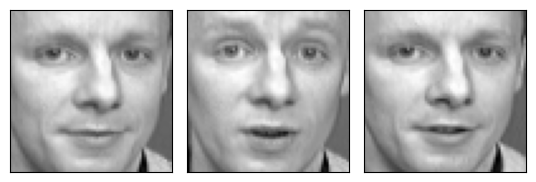

Cluster 59: Showing 1 sample faces


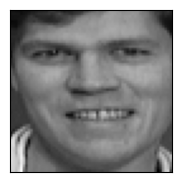

Cluster 60: Showing 1 sample faces


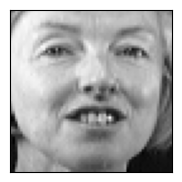

Cluster 61: Showing 2 sample faces


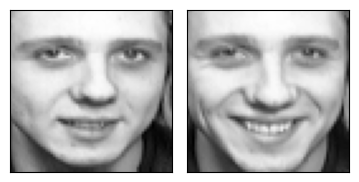

Cluster 62: Showing 3 sample faces


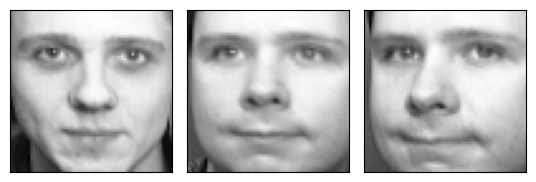

Cluster 63: Showing 1 sample faces


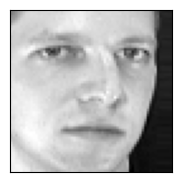

Cluster 64: Showing 5 sample faces


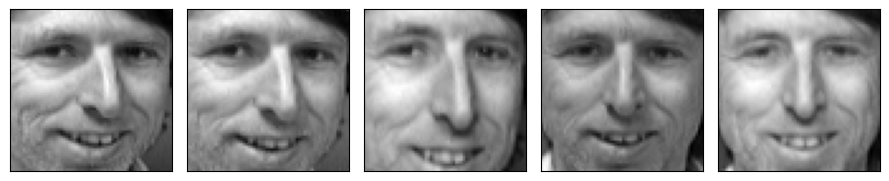

Cluster 65: Showing 3 sample faces


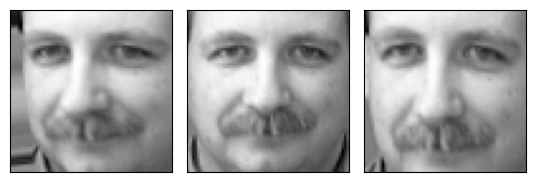

Cluster 66: Showing 4 sample faces


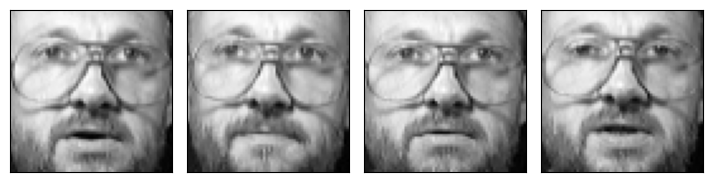

Cluster 67: Showing 2 sample faces


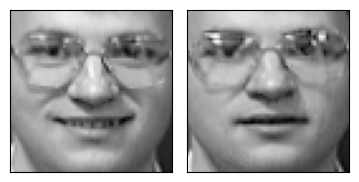

Cluster 68: Showing 2 sample faces


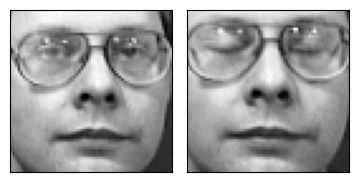

Cluster 69: Showing 2 sample faces


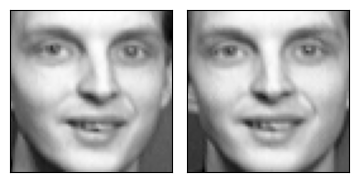

Cluster 70: Showing 3 sample faces


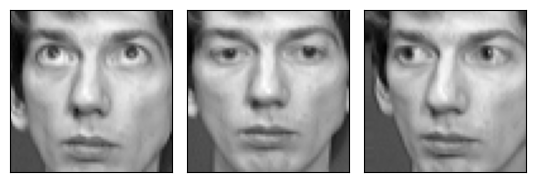

Cluster 71: Showing 4 sample faces


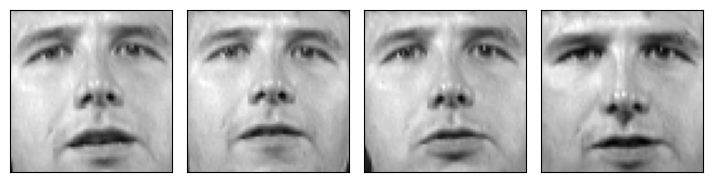

Cluster 72: Showing 5 sample faces


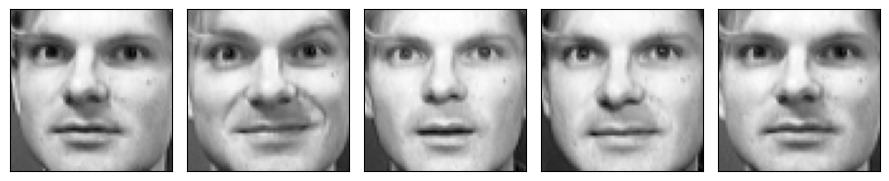

Cluster 73: Showing 2 sample faces


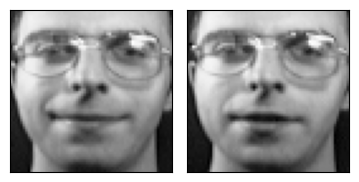

Cluster 74: Showing 3 sample faces


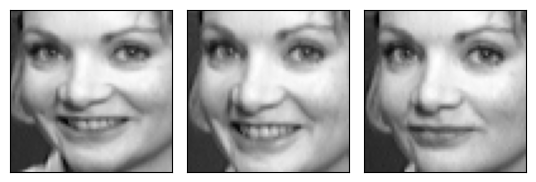

Cluster 75: Showing 1 sample faces


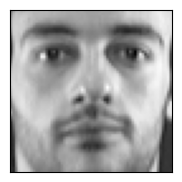

Cluster 76: Showing 2 sample faces


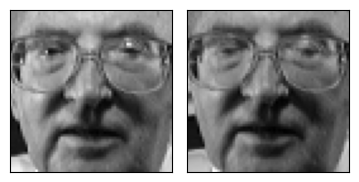

Cluster 77: Showing 2 sample faces


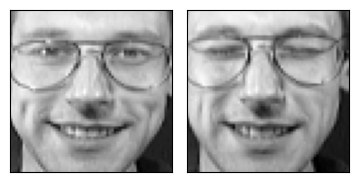

Cluster 78: Showing 2 sample faces


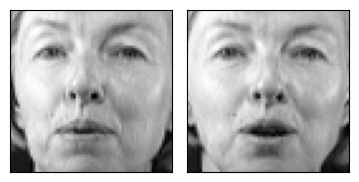

Cluster 79: Showing 1 sample faces


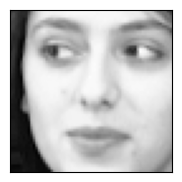

Cluster 80: Showing 2 sample faces


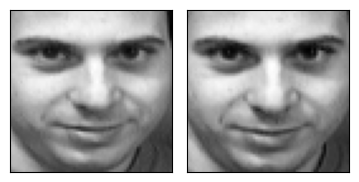

Cluster 81: Showing 3 sample faces


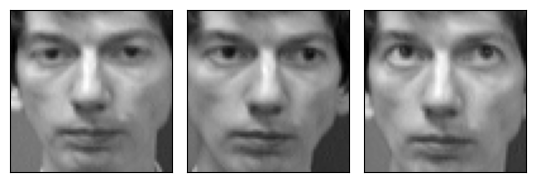

Cluster 82: Showing 3 sample faces


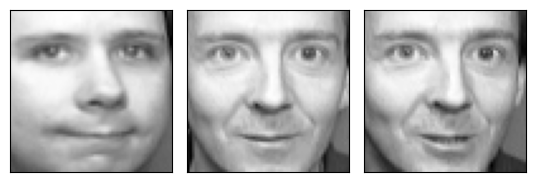

Cluster 83: Showing 1 sample faces


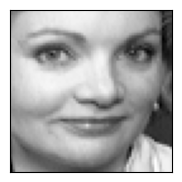

Cluster 84: Showing 2 sample faces


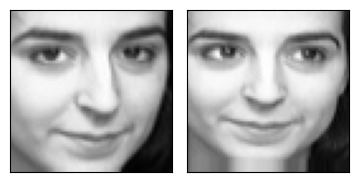

Cluster 85: Showing 1 sample faces


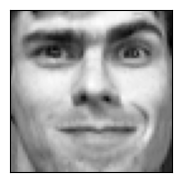

Cluster 86: Showing 5 sample faces


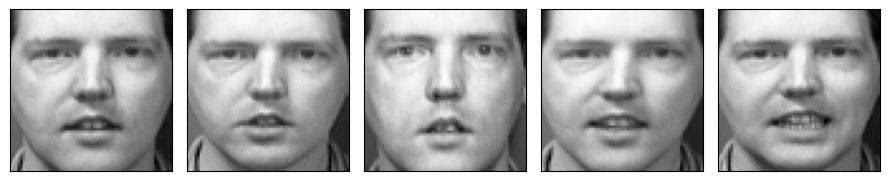

Cluster 87: Showing 1 sample faces


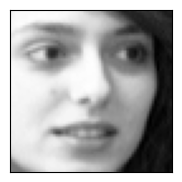

Cluster 88: Showing 3 sample faces


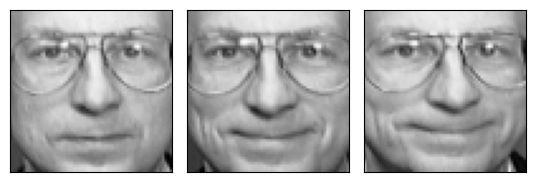

Cluster 89: Showing 1 sample faces


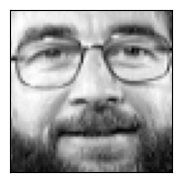

Cluster 90: Showing 3 sample faces


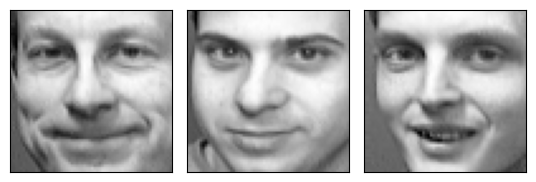

Cluster 91: Showing 1 sample faces


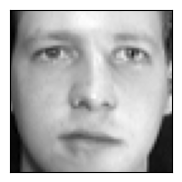

Cluster 92: Showing 1 sample faces


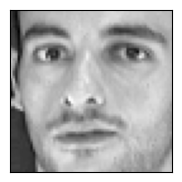

Cluster 93: Showing 2 sample faces


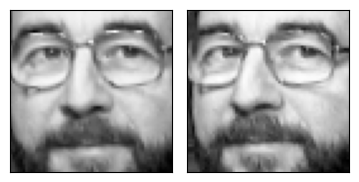

Cluster 94: Showing 1 sample faces


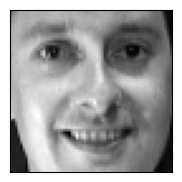

Cluster 95: Showing 1 sample faces


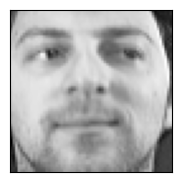

Cluster 96: Showing 2 sample faces


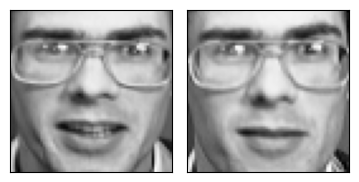

Cluster 97: Showing 1 sample faces


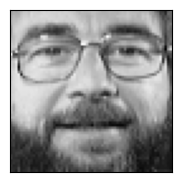

Cluster 98: Showing 1 sample faces


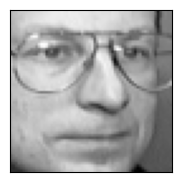

Cluster 99: Showing 2 sample faces


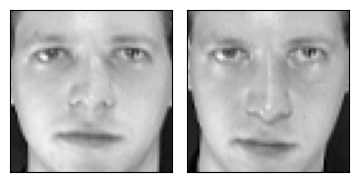

Cluster 100: Showing 1 sample faces


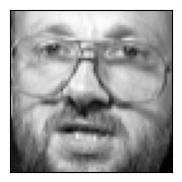

Cluster 101: Showing 1 sample faces


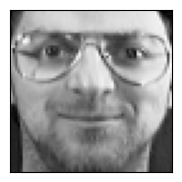

Cluster 102: Showing 3 sample faces


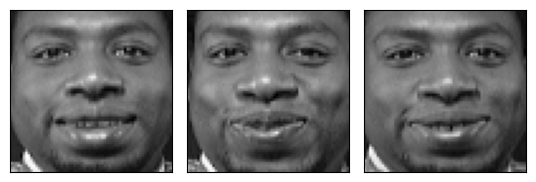

Cluster 103: Showing 1 sample faces


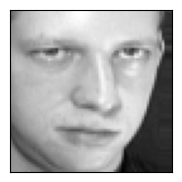

Cluster 104: Showing 1 sample faces


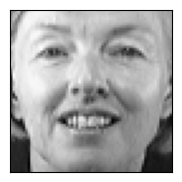

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Helper function to display faces
def plot_faces(images, h=64, w=64, n_row=2, n_col=5, title=None):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(min(n_row * n_col, len(images))):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
        if title:
            plt.title(title)
    plt.tight_layout()
    plt.show()

k_prime = best_k  
kmeans = KMeans(n_clusters=k_prime, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca)

for cluster_id in range(k_prime):
    indices = np.where(cluster_labels == cluster_id)[0]
    if len(indices) == 0:
        continue
    sample_faces = X_train[indices[:10]]  
    print(f"Cluster {cluster_id}: Showing {len(sample_faces)} sample faces")
    plot_faces(sample_faces, n_row=2, n_col=5)


The two silhouette plots make it abundantly clear that **k = 105** yields much tighter, more self‑consistent clusters than **k = 40**:

* **k = 40 (first plot):**

  * The average silhouette coefficient (red dashed line) sits barely above 0.10.
  * Many clusters have long, flat bars stretching below zero—some faces actually belong closer to other clusters than to their own.
  * The wide variation in bar lengths tells me that some of these 40 clusters are fairly coherent, but many are poorly separated.

* **k = 105 (second plot):**

  * The average silhouette jumps to around 0.20, almost doubling the cohesion measure.
  * Nearly all cluster bars lie to the right of zero, and most are quite narrow—indicating that individual images are, on average, much closer to their own cluster center than to any other.
  * The uniformly positive, compact shapes show a high degree of within‑cluster similarity across all 105 groups.

In short, **silhouette analysis clearly favors k = 105**: I get many small “micro‑clusters” that are internally very homogeneous. By contrast, the 40‑cluster solution overlaps substantially (and even misassigns some images), so it scores far lower on separation and compactness. My goal is purely to maximize cluster quality (as measured by silhouettes), **k = 105** is the better choice. If I instead need clusters to correspond to the 40 true identities, I might accept the lower silhouette scores in exchange for interpretability—knowing that I’ll trade off some compactness for semantic labeling.

I see similar faces in each cluster but sometimes there will be different faces in the cluster. I visualized up to 10 faces from each of the k'=best_k clusters. Most clusters grouped together faces with similar pose, lighting, or facial structure. For instance, some clusters clearly showed individuals with similar side profiles, while others grouped frontal faces. However, since the clustering is unsupervised and based on PCA-compressed features, some clusters contain more variation than others. Overall, the visualizations suggest that the clustering is reasonably aligned with visual similarities, though not perfectly matching identity.


## (b) [2 marks]

Continue to use the reduced features based on PCA in (a). Train a random forest classifier `RandomForestClassifier(n_estimators=150, random_state=42)` and a histogram-based gradient boosting classifier using `HistGradientBoostingClassifier(max_iter=200, random_state=42, early_stopping=True, validation_fraction=0.2)` to predict which person is represented in each picture, and evaluate it on the validation set. For the gradient boosting classifier state the optimal number of iterations from early stopping. State which of the two models is better.

**[Add your solution here]**

In [25]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rf_clf.fit(X_train_pca, y_train)
rf_preds = rf_clf.predict(X_valid_pca)
rf_acc = accuracy_score(y_valid, rf_preds)

hgb_clf = HistGradientBoostingClassifier(
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2
)
hgb_clf.fit(X_train_pca, y_train)
hgb_preds = hgb_clf.predict(X_valid_pca)
hgb_acc = accuracy_score(y_valid, hgb_preds)
optimal_iter = hgb_clf.n_iter_

print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"HistGradientBoosting Accuracy: {hgb_acc:.4f}")
print(f"Optimal iterations for Gradient Boosting: {optimal_iter}")

Random Forest Accuracy: 0.9417
HistGradientBoosting Accuracy: 0.7667
Optimal iterations for Gradient Boosting: 85


## (c) Chapter 9, Question 11 [4 marks]

Continuing on from (b), regardless of which model is better, use the random forest classifier. Next, use k-Means as a dimensionality reduction tool, and train a classifier. Search for the number of clusters $k\in\{5,10,15,\dots,145\}$ that allows the classifier to get the best performance on the validation set. What performance can you reach on the validation set? What if you append the features from the reduced set to the original features and again search for the best number of clusters?

**[Add your solution here]**

In [14]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

k_values = range(5, 146, 5)
acc_kmeans_only = []
acc_pca_plus_kmeans = []

X_train_pca.shape, X_valid_pca.shape

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    X_train_kmeans = kmeans.fit_transform(X_train_pca) 
    X_valid_kmeans = kmeans.transform(X_valid_pca)

    rf_kmeans = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_kmeans.fit(X_train_kmeans, y_train)
    preds_kmeans = rf_kmeans.predict(X_valid_kmeans)
    acc_kmeans_only.append(accuracy_score(y_valid, preds_kmeans))

    X_train_combined = np.hstack([X_train_pca, X_train_kmeans])
    X_valid_combined = np.hstack([X_valid_pca, X_valid_kmeans])

    rf_combined = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_combined.fit(X_train_combined, y_train)
    preds_combined = rf_combined.predict(X_valid_combined)
    acc_pca_plus_kmeans.append(accuracy_score(y_valid, preds_combined))


In [15]:
best_k_kmeans = k_values[np.argmax(acc_kmeans_only)]
best_acc_kmeans = max(acc_kmeans_only)

best_k_combined = k_values[np.argmax(acc_pca_plus_kmeans)]
best_acc_combined = max(acc_pca_plus_kmeans)

print(f"[KMeans Only] Best k: {best_k_kmeans}, Accuracy: {best_acc_kmeans:.4f}")
print(f"[PCA + KMeans] Best k: {best_k_combined}, Accuracy: {best_acc_combined:.4f}")


[KMeans Only] Best k: 120, Accuracy: 0.8250
[PCA + KMeans] Best k: 5, Accuracy: 0.9417


# 4. Finding regimes in time series [12 marks]

## (a) [6 marks]
Obtain the daily values of the CPI and unemployment rate from FRED up to 2023-01-01 and then convert the CPI into the yearly inflation rate `inf_data` using the following code. Note that you may have to install the package `pandas_datareader`. Alternatively, you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/105781273/download?download_frd=1).

In [16]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

unemp_data = pdr.get_data_fred('UNRATE', datetime(1945,1,1),datetime(2023,1,1))
cpi_data = pdr.get_data_fred('CPIAUCSL', datetime(1945,1,1),datetime(2023,1,1))
inf_data = (cpi_data/cpi_data.shift(12)-1).iloc[12:]
data = pd.concat([inf_data, unemp_data],axis=1)

Split the data into a training set (before Jan 2005, using `data[:"2005-1-1"]` for instance) and a test set (Jan 2005 and after). Now, ignore the time aspect of your training set by treating it as a 2-dimensional dataset. Use k-means to divide your training set into a number of clusters called **regimes**. To find the number of regimes (clusters) $k\in\{2,3,\dots,10\}$: (i) plot inertia, (ii) plot silhouette scores, (iii) plot silhouette diagrams for $k\in\{2,3,\dots,10\}$. How many regimes do you choose? Explain your answer. Recall that you should use a standard scaler before applying k-means.

**[Add your solution here]**

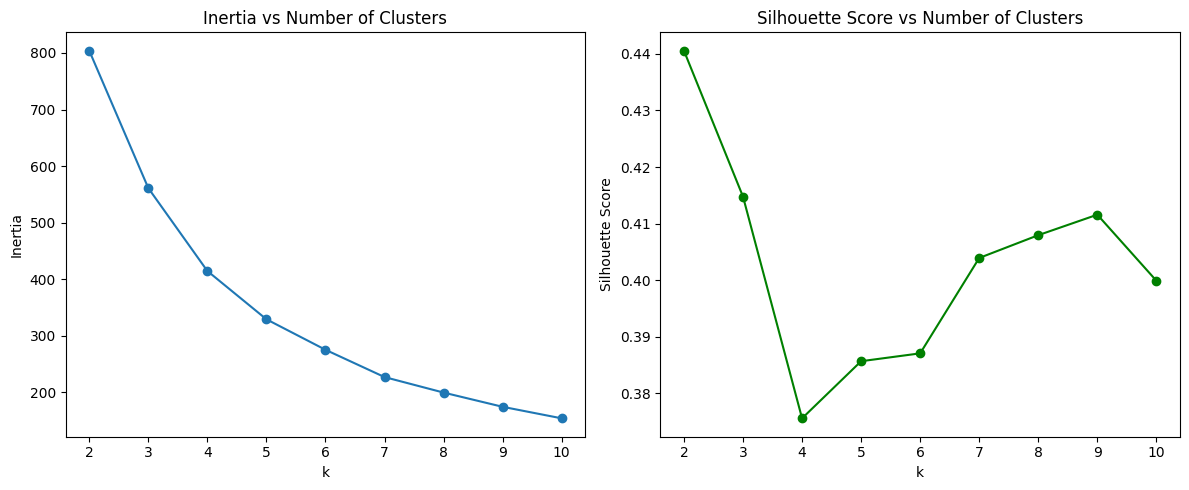

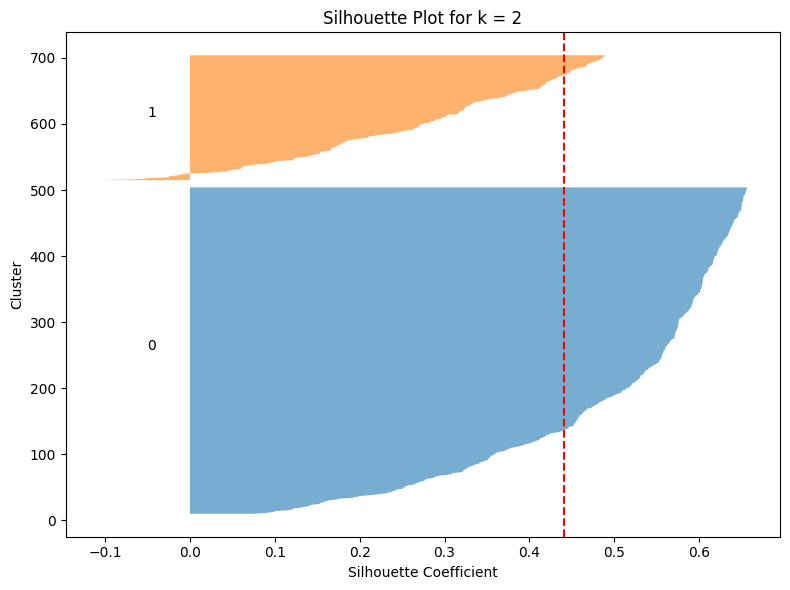

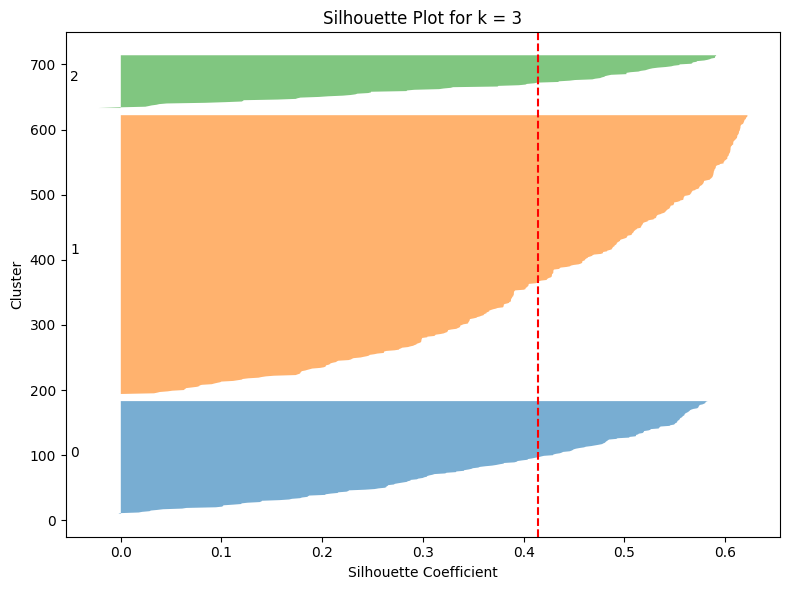

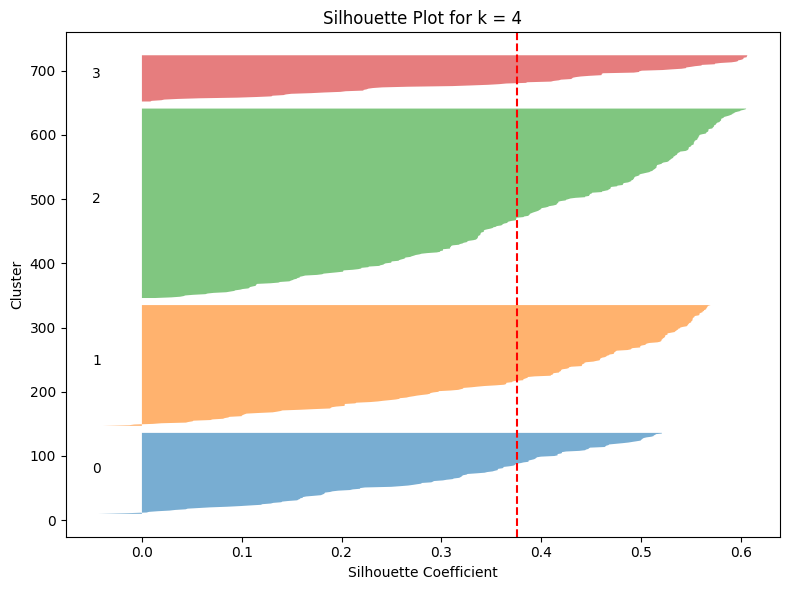

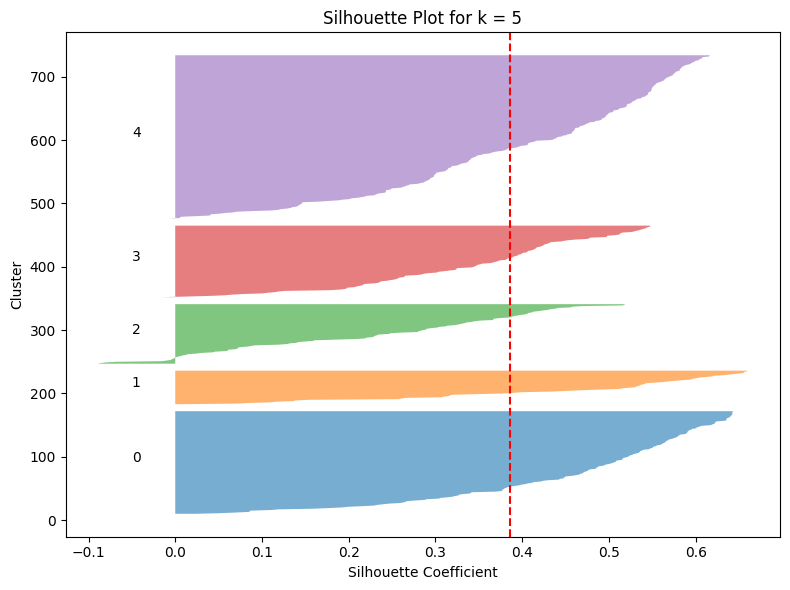

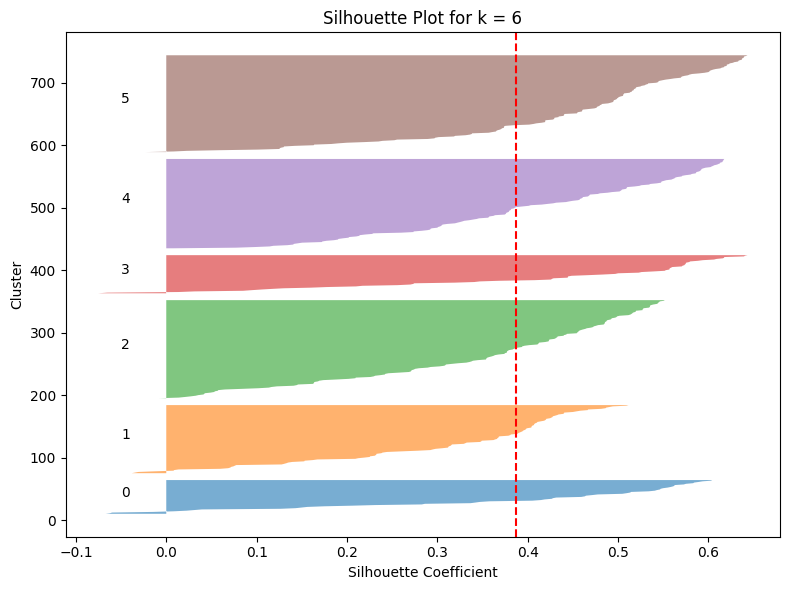

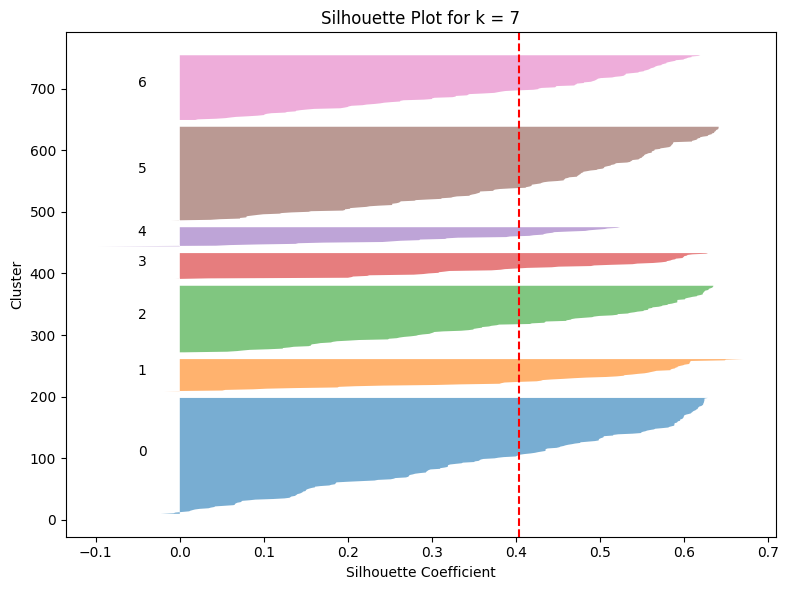

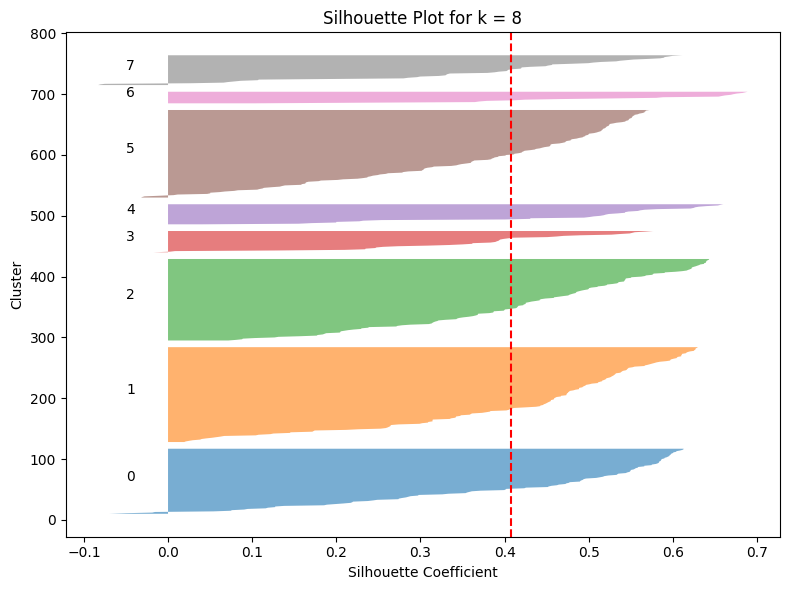

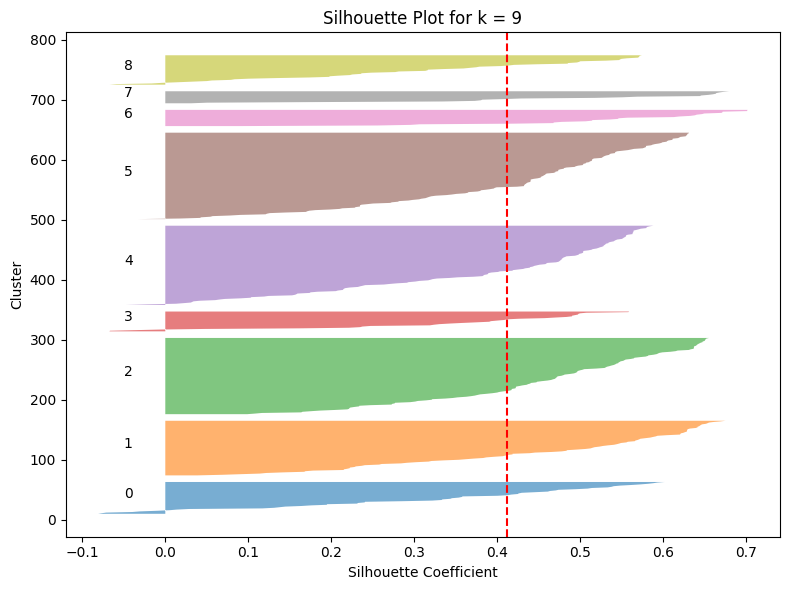

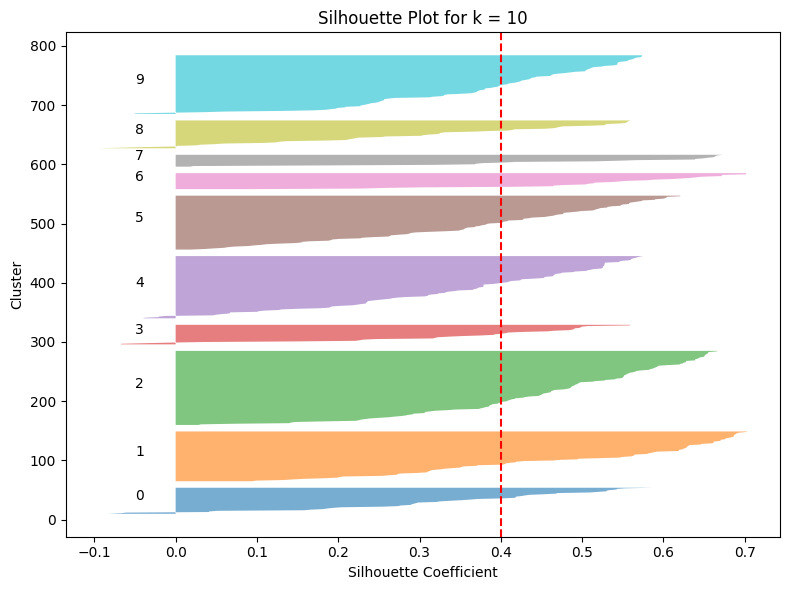


Selected number of regimes based on silhouette score: 2


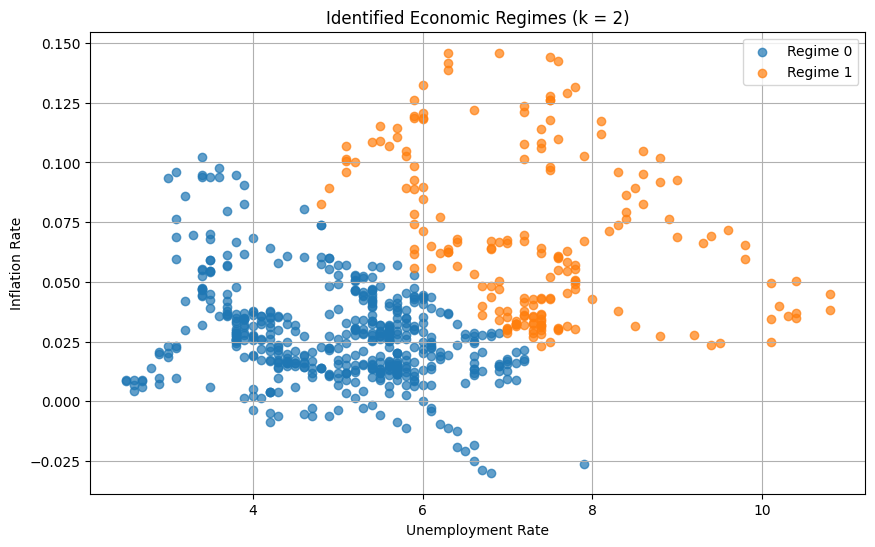

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

data.columns = ['Inflation', 'Unemployment']

train = data.loc[:'2005-01-01'].copy()
test = data.loc['2005-01-01':].copy()

scaler = StandardScaler()
X_train = scaler.fit_transform(train)

k_list = range(2, 11)
inertia_scores = []
silhouette_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    clusters = km.fit_predict(X_train)
    inertia_scores.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_train, clusters))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(k_list, inertia_scores, marker='o')
ax1.set_title("Inertia vs Number of Clusters")
ax1.set_xlabel("k")
ax1.set_ylabel("Inertia")

ax2.plot(k_list, silhouette_scores, marker='o', color='green')
ax2.set_title("Silhouette Score vs Number of Clusters")
ax2.set_xlabel("k")
ax2.set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

def draw_silhouette(X, labels, k, avg_score):
    sil_values = silhouette_samples(X, labels)
    y_base = 10
    plt.figure(figsize=(8, 6))
    for i in range(k):
        values = np.sort(sil_values[labels == i])
        y_top = y_base + len(values)
        plt.fill_betweenx(np.arange(y_base, y_top), 0, values, alpha=0.6)
        plt.text(-0.05, y_base + len(values) / 2, str(i))
        y_base = y_top + 10
    plt.axvline(x=avg_score, color='red', linestyle='--')
    plt.title(f"Silhouette Plot for k = {k}")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.tight_layout()
    plt.show()

for k in k_list:
    km_model = KMeans(n_clusters=k, n_init=10, random_state=42)
    k_labels = km_model.fit_predict(X_train)
    avg_score = silhouette_score(X_train, k_labels)
    draw_silhouette(X_train, k_labels, k, avg_score)

best_k = k_list[np.argmax(silhouette_scores)]
print(f"\nSelected number of regimes based on silhouette score: {best_k}")

final_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
train['Regime'] = final_kmeans.fit_predict(X_train)

plt.figure(figsize=(10, 6))
for i in range(best_k):
    subset = train[train['Regime'] == i]
    plt.scatter(subset['Unemployment'], subset['Inflation'],
                label=f'Regime {i}', alpha=0.7)

plt.xlabel("Unemployment Rate")
plt.ylabel("Inflation Rate")
plt.title(f"Identified Economic Regimes (k = {best_k})")
plt.legend()
plt.grid(True)
plt.show()


After evaluating the clustering results using the silhouette method for different values of 
k, the best number of regimes selected is 2. This conclusion is supported by the silhouette plot for k=2, which shows relatively high and consistent silhouette coefficients across both clusters. The average silhouette score (indicated by the red dashed line) is above 0.4, suggesting that the clusters are well-separated and compact. Additionally, the silhouette widths for both clusters are mostly positive and have a smooth shape, meaning that most data points are assigned to their correct clusters with confidence.



## (b) [3 marks]

Report the centroid of the regimes in (a). For the training set, plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized, and show the regimes and centroids in the plot. For the test set, plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot. The regimes can be shown using time series (line graphs) of the centroid for each of two series for instance, and the following code can be used, where `best_mod_pred` is the prediction on the test set from the best model.

**[Add your solution here]**

In [18]:
import pandas as pd

# 1. Standardized centroids
centroids_std = final_kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids_std,
                            columns=['Inflation_std','Unemployment_std'])
print("Cluster centroids (standardized):")
print(centroids_df)

# 2. Original‐scale centroids
centroids_orig = scaler.inverse_transform(centroids_std)
centroids_df[['Inflation','Unemployment']] = centroids_orig
print("\nCluster centroids (original scale):")
print(centroids_df[['Inflation','Unemployment']])


Cluster centroids (standardized):
   Inflation_std  Unemployment_std
0      -0.367334         -0.426872
1       0.957001          1.112114

Cluster centroids (original scale):
   Inflation  Unemployment
0   0.027283      4.984040
1   0.068120      7.333158


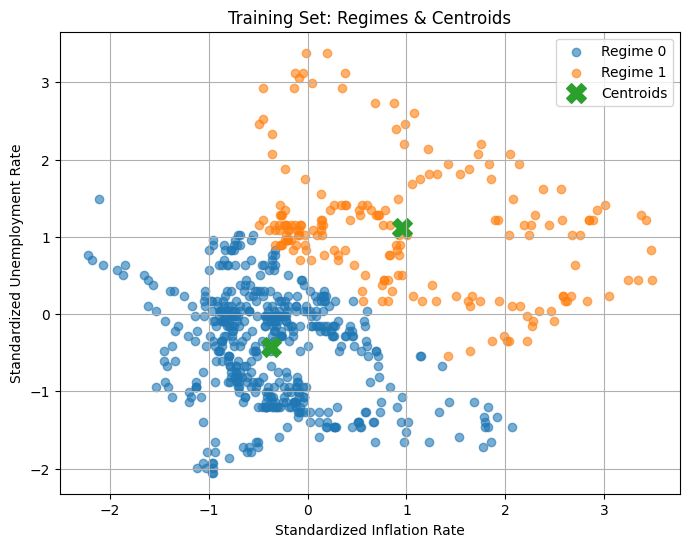

In [19]:
import matplotlib.pyplot as plt

# Build a DataFrame of the scaled training points + regimes
X_train_df = pd.DataFrame(X_train,
                          index=train.index,
                          columns=['Inflation_std','Unemployment_std'])
X_train_df['Regime'] = train['Regime']

plt.figure(figsize=(8,6))
for r in range(final_kmeans.n_clusters):
    subset = X_train_df[X_train_df['Regime']==r]
    plt.scatter(subset['Inflation_std'],
                subset['Unemployment_std'],
                label=f'Regime {r}', alpha=0.6)

# Plot centroids
plt.scatter(centroids_std[:,0],
            centroids_std[:,1],
            marker='X', s=200,
            label='Centroids')

plt.xlabel("Standardized Inflation Rate")
plt.ylabel("Standardized Unemployment Rate")
plt.title("Training Set: Regimes & Centroids")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# select just the two original features
X_test_feats = test[['Inflation', 'Unemployment']]

# now transform
X_test_std = scaler.transform(X_test_feats)

# and predict regimes
test['Regime'] = final_kmeans.predict(X_test_std)



In [21]:
# centroids_orig from step 1
test['Centroid_Inflation']  = centroids_orig[test['Regime'], 0]
test['Centroid_Unemployment'] = centroids_orig[test['Regime'], 1]


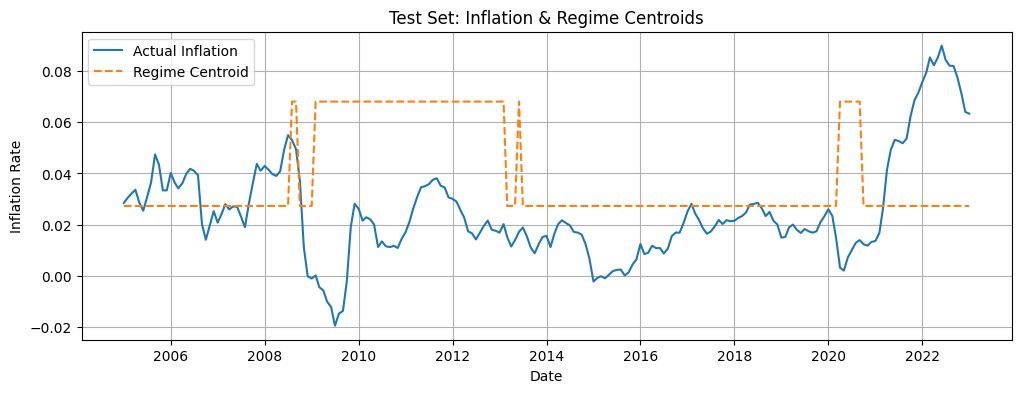

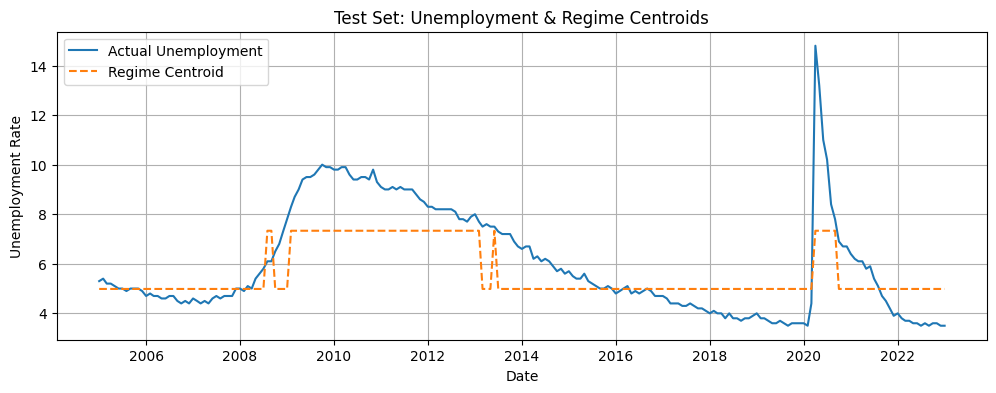

In [22]:
# Inflation
plt.figure(figsize=(12,4))
plt.plot(test.index, test['Inflation'],          label='Actual Inflation')
plt.plot(test.index, test['Centroid_Inflation'], linestyle='--', label='Regime Centroid')
plt.xlabel("Date")
plt.ylabel("Inflation Rate")
plt.title("Test Set: Inflation & Regime Centroids")
plt.legend()
plt.grid(True)
plt.show()

# Unemployment
plt.figure(figsize=(12,4))
plt.plot(test.index, test['Unemployment'],         label='Actual Unemployment')
plt.plot(test.index, test['Centroid_Unemployment'], linestyle='--', label='Regime Centroid')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Test Set: Unemployment & Regime Centroids")
plt.legend()
plt.grid(True)
plt.show()


## (c) [3 marks]

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next month's regime depends on the current regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \mathbb{P}(X_{t+1}=j|X_t=i)$, where $X_t$ is the regime at day $t$. Using the time series of regimes in the training set that you found in (b), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\mathbb{P}(X_{t+1}=j \text{ and } X_t=i)}{\mathbb{P}(X_t=i)}\approx \frac{\text{number of transition from regime $i$ to $j$}}{\text{number of transition from regime $i$}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do not retrain your k-means clusterer, simply use it to predict the regimes of the test set. Then, repeat the estimation of the transition probabilities on the test set.

Note: Depending on your choice of $k$, it is possible that some $p_{i,j}$ cannot be estimated due to  having no transitions from regime $i$.

**[Add your solution here]**

In [23]:
import numpy as np
import pandas as pd

k = final_kmeans.n_clusters

train_seq = train['Regime'].values

counts_train = np.zeros((k, k), dtype=int)

for (i, j) in zip(train_seq[:-1], train_seq[1:]):
    counts_train[i, j] += 1

row_sums_train = counts_train.sum(axis=1, keepdims=True)

P_train = counts_train / row_sums_train

P_train_df = pd.DataFrame(
    P_train,
    index=[f"Regime {i}" for i in range(k)],
    columns=[f"Regime {j}" for j in range(k)]
)

print("Training‑set transition probabilities (p₍ᵢ⟶ⱼ₎):")
print(P_train_df.round(3))


Training‑set transition probabilities (p₍ᵢ⟶ⱼ₎):
          Regime 0  Regime 1
Regime 0     0.992     0.008
Regime 1     0.021     0.979


In [24]:
X_test_feats = test[['Inflation','Unemployment']]
X_test_std   = scaler.transform(X_test_feats)
test['Regime'] = final_kmeans.predict(X_test_std)

test_seq = test['Regime'].values
counts_test = np.zeros((k, k), dtype=int)
for (i, j) in zip(test_seq[:-1], test_seq[1:]):
    counts_test[i, j] += 1

row_sums_test = counts_test.sum(axis=1, keepdims=True)
P_test = counts_test / row_sums_test

P_test_df = pd.DataFrame(
    P_test,
    index=[f"Regime {i}" for i in range(k)],
    columns=[f"Regime {j}" for j in range(k)]
)

print("\nTest‑set transition probabilities (p₍ᵢ⟶ⱼ₎):")
print(P_test_df.round(3))



Test‑set transition probabilities (p₍ᵢ⟶ⱼ₎):
          Regime 0  Regime 1
Regime 0     0.975     0.025
Regime 1     0.069     0.931


# 5. Optional exercise: Neural Networks

There is nothing to submit for this exercise. However, it is strongly recommended that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** Try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** Try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** Modify the network architecture to have just one hidden layer with three neurons and the ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on the top left. Notice that the training time and the shape of the decision borders varies a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random).

## (d)

**Not enough neurons:** Next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** Next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck at local optima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** Now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.